You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


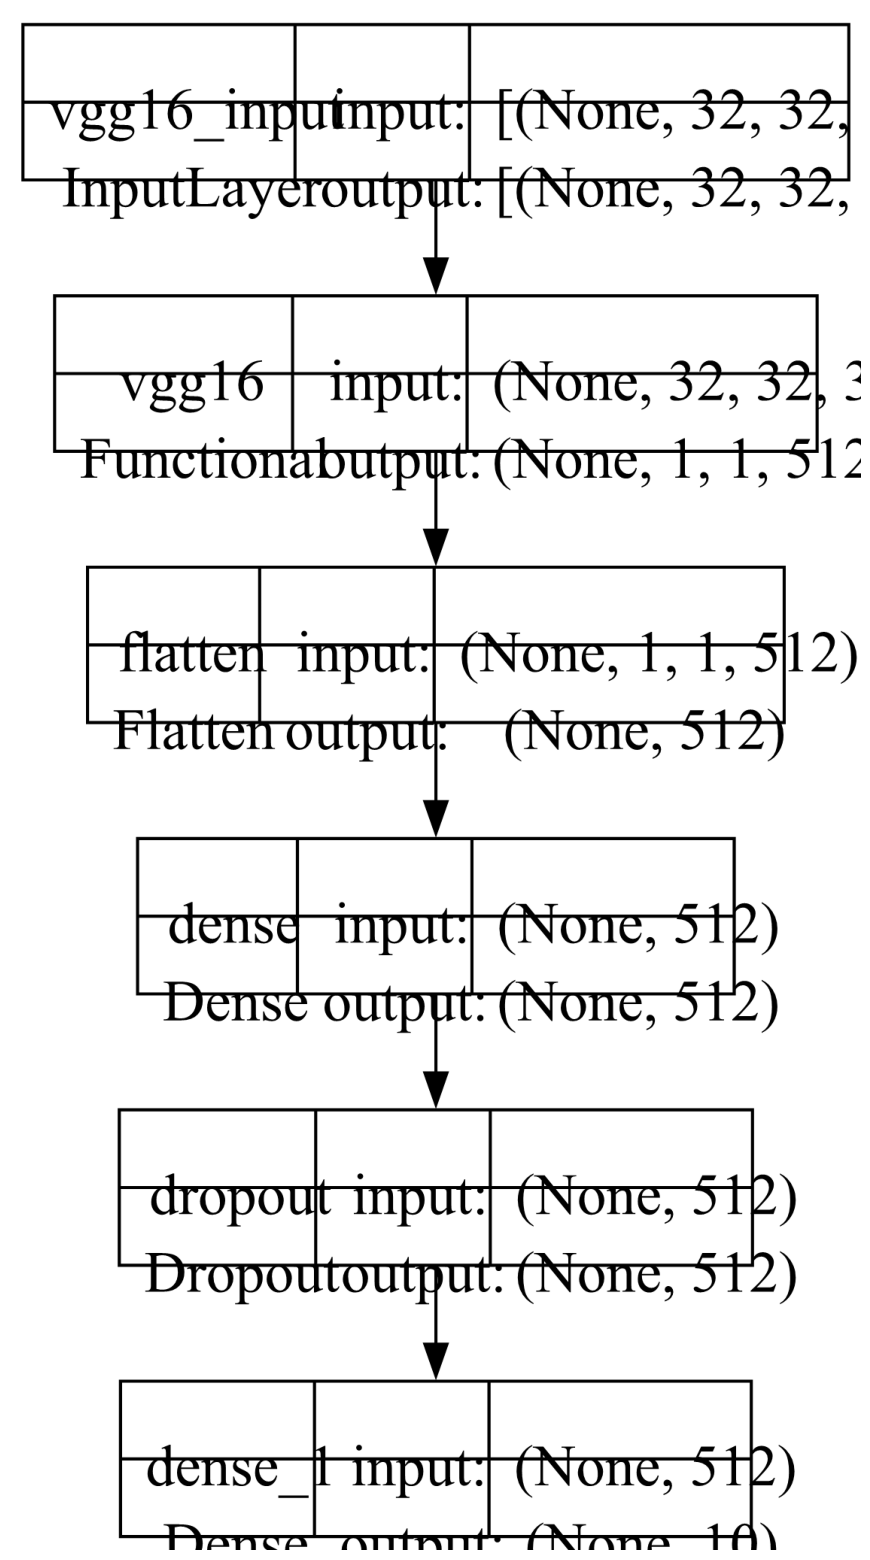

Epoch 1/10
1250/1250 [==============================] - 81s 65ms/step - loss: 1.7765 - accuracy: 0.3726 - val_loss: 1.4668 - val_accuracy: 0.5013
Epoch 2/10
1250/1250 [==============================] - 86s 69ms/step - loss: 1.4628 - accuracy: 0.4900 - val_loss: 1.3568 - val_accuracy: 0.5332
Epoch 3/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.3739 - accuracy: 0.5244 - val_loss: 1.2991 - val_accuracy: 0.5555
Epoch 4/10
1250/1250 [==============================] - 86s 69ms/step - loss: 1.3190 - accuracy: 0.5424 - val_loss: 1.2633 - val_accuracy: 0.5638
Epoch 5/10
1250/1250 [==============================] - 86s 69ms/step - loss: 1.2822 - accuracy: 0.5552 - val_loss: 1.2352 - val_accuracy: 0.5719
Epoch 6/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.2509 - accuracy: 0.5661 - val_loss: 1.2169 - val_accuracy: 0.5757
Epoch 7/10
1250/1250 [==============================] - 86s 69ms/step - loss: 1.2277 - accuracy: 0.5742 - val_loss: 1.2014 -

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train = x_train /255.0
x_test = x_test /255.0
vgg_base = VGG16(weights= 'imagenet', include_top = False, input_shape=(32,32,3))
for layer in vgg_base.layers:
    layer.trainable =False
model= Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001),loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
plot_model(model, to_file ='cnn.png', show_shapes= True,show_layer_names= True, dpi=300)
plt.figure(figsize=(20,20))
img = plt.imread('cnn.png')
plt.imshow(img)
plt.axis('off')
plt.show()
history= model.fit(x_train, y_train,epochs=10, batch_size =32,validation_split=0.2)
test_loss, test_acc= model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'test Accuracy: {test_acc * 100:.2f}%')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label= 'Train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val loss'], label= 'validation loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.tight_layout()
plt.show()
class_names =['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sample =x_test[0].reshape(1,32,32,3)
prediction = model.predict(sample)
predicted_class = class_names[np.argmax(prediction)]
plt.imshow(x_test[0])
plt.title(f"Predicted:{predicted_class}")
plt.axis('off')
plt.show()


